# Vacinação para a Covid-19 no Rio Grande do Norte

## Essa primeira seção contém somente uma rápida exploração dos dados baixados no site do ministério da saúde



Análise dos dados para a vacinação da Covid-19 no estado do Rio Grande do Norte. O intuito de analisar este dataset foi procurar responder as seguintes perguntas:

Quantas pessoas já estão vacinadas com pelo menos 1 dose (D1)?

Quantas pessoas já estão completamente vacinadas (D1+D2)?

O gêneros (homem/mulher) que foram mais cobertos com a vacinação?

A idade média das pesoas que está completamente imunizada?

Qual é o perfil dos vacinados quanto a raça?

Qual foi a vacina mais aplicada por fabricante?



Link do arquivo csv: data do acesso: 12/08/2021 [Opendatasus](https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao/resource/ef3bd0b8-b605-474b-9ae5-c97390c197a8)

In [4]:
# !pip install plotly --upgrade

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Explorando os dados superficialmente

In [6]:
# Carregando os dados do arquivo csv sobre a vacinação no Rio Grande do Norte
data_vac = pd.read_csv('vacina_RN.csv', sep=';')

In [7]:
# Vamos ver quantas linhas e colunas tem o nosso dataset

data_vac.shape

(3289543, 34)

In [8]:
# As 5 primeiras linhas do arquivo
data_vac.head()

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,e74c056c-022d-4c89-b052-884161f3a87e-i0b0,cfe7f8db3006aa584f972ae8482eb41ce6e297bb8e7ff7...,63.0,1957-06-22,M,1.0,BRANCA,240570.0,10.0,JARDIM DO SERIDO,...,213VCD011W,FUNDACAO OSWALDO CRUZ,NaN,2021-04-27,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-04-29T04:07:36.000Z,17862
1,0247fa6c-c0f9-4817-aaec-930c6078562b-i0b0,3b13671c56ed7804b71b77618c3ddea06bdecfd03a95ad...,59.0,1962-03-18,F,4.0,AMARELA,240050.0,10.0,ALEXANDRIA,...,216VCD204W,SINOVAC LIFE SCIENCE CO LTD,NaN,2021-08-16,2ª Dose,85,Vacina Covid-19 - Covishield,ESUS APS - NACIONAL (OFFLINE),2021-08-18T10:00:44.000Z,18602
2,ec00a125-f293-4251-aee4-c0d890bdaa22-i0b0,bfdb933de7d59e4f3e8a1dbbe0481d2419bdced51654aa...,34.0,1987-07-22,M,4.0,AMARELA,241260.0,10.0,SAO PAULO DO POTENGI,...,FD7209,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-08-09,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-08-11T19:20:53.000Z,17862
3,1af33330-0d0b-4f9d-bf3c-236754e527a3-i0b0,4aa1b4ecd8f8d21ed5e2766109bf228bbe4666c19fea28...,54.0,1967-05-04,M,3.0,PARDA,240810.0,10.0,NATAL,...,216VCD204W,SINOVAC LIFE SCIENCE CO LTD,NaN,2021-08-16,2ª Dose,85,Vacina Covid-19 - Covishield,ESUS APS - NACIONAL (OFFLINE),2021-08-18T10:00:44.000Z,18602
4,91458a1e-a6b7-4d33-bf7e-1e18df851130-i0b0,6470c9d084c5b9963b6d3da184e7a618276b6351c15c25...,22.0,1999-01-25,M,1.0,BRANCA,240810.0,10.0,NATAL,...,FD7221,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-07-30,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-07-30T17:42:12.000Z,17862


Uma primeira dos dados acima mostra que:

1 - categorias entre 101 e 111 e de comorbidades

2 - categorias entre 201 e 205 foram a faixa etaria de pessoas de 80 anos ou mais

3-  301 e de Pessoas de 60 nos ou mais Institucionalizadas

4 - 401 ate 403 e forcas armadas

5 - 501 ate 207 sao os agentes de seguranca (bombeiros, guardas civil/militar, policia rodovi. )

6 - 601 sao quilombolas

7 - 701 sao povos indigenas

8 - 801 e 802 ensino basico e ensino superior

9 - Trabalhadores da saude 901 ate 929
    901: Auxiliar de Veterinário 
    902: Biólogo
    903: Biomédico  
    904: Cozinheiros e auxiliares
    905: cuidados de idoso
    906: doula/parteira
    907: enfermeiros
    908: Farmacêutico
    909: Fisioterapeutas
    910: Fonoaudiólogo
    911: Funcionário do Sistema Funerário c/ cadáveres
    912: Médico
    913: Médico Veterinário
    914: Motorista de Ambulância
    915: Nutricionista
    916: Odontologista
    917: Pessoal da Limpeza
    918: Profissionais de Educação Física
    
10 - 930 931 e 932 nao estao especificados

11 - 1001 ate 1006 sao trabalhadores de transportes
     
12 1101 e 1102 sao PCD

13 - 1201   Pessoas em Situação de Rua

14 - 1301     Trabalhadores Portuários

15 - 1401 funcionarios do sistema prisional

16 - 1501 populacao carceraria

Sao apenas algumas das categorias identificadas

In [9]:
# Exibindo as cinco ultimas linhas do arquivo
data_vac.tail(5)

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
3289538,1874ce69-d923-4334-8d45-1cedf2b0486c-i0b0,dafe093ac76efbfb4b67363eb055ade38ab4f826dbfebe...,50.0,1971-05-26,M,99.0,SEM INFORMACAO,240325.0,10.0,PARNAMIRIM,...,214VCD107Z,FUNDACAO OSWALDO CRUZ,NaN,2021-06-15,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-06-16T22:22:41.000Z,17862
3289539,494a2eba-8b61-4c15-9b94-f8463f95e804-i0b0,f8f3308795d1df5201d08f0ec7fcff6c281ecfdeb8be88...,37.0,1983-12-13,M,1.0,BRANCA,240730.0,10.0,MARCELINO VIEIRA,...,FD7219,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-08-03,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-08-09T04:34:54.000Z,17862
3289540,25e865a7-e755-4dca-be42-13464218fa55-i0b0,2537780f085ebf3533fee1a68540bb61b14b24ef4d1655...,28.0,1993-04-22,M,1.0,BRANCA,240200.0,10.0,CAICO,...,FD7209,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-08-07,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-08-08T05:22:27.000Z,17862
3289541,b6578485-5c22-430b-81d5-5a1d062ad03b-i0b0,0fa196d796446eb5c13d27424e93da48997c1de8fe78a8...,82.0,1938-05-10,M,1.0,BRANCA,241390.0,10.0,TAIPU,...,4120Z001,FUNDACAO OSWALDO CRUZ,NaN,2021-03-04,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-04-07T22:58:16.000Z,17862
3289542,353df01e-a0dd-4976-91ee-6cca10b6f05c-i0b0,db4c3a47f752768364f8e9e86378b0e216da258a6a2af0...,44.0,1977-01-29,F,1.0,BRANCA,240200.0,10.0,CAICO,...,213VCD032W,FUNDACAO OSWALDO CRUZ,NaN,2021-05-25,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-06-18T22:45:50.000Z,17862


In [10]:
# Quantas pessoas acima de 60 anos foram vacinadas? 881000 

data_vac[data_vac['paciente_idade'] >= 60]

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,e74c056c-022d-4c89-b052-884161f3a87e-i0b0,cfe7f8db3006aa584f972ae8482eb41ce6e297bb8e7ff7...,63.0,1957-06-22,M,1.0,BRANCA,240570.0,10.0,JARDIM DO SERIDO,...,213VCD011W,FUNDACAO OSWALDO CRUZ,NaN,2021-04-27,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-04-29T04:07:36.000Z,17862
6,23bacf54-fef0-4aac-9d3e-29170c016b13-i0b0,7eae96bba6771481e12667522433c67fff0182173e6f5e...,89.0,1931-12-08,M,3.0,PARDA,240325.0,10.0,PARNAMIRIM,...,4120Z001,FUNDACAO OSWALDO CRUZ,NaN,2021-03-04,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-03-04T15:34:54.000Z,17862
11,4186214a-3224-4563-858e-95e6310b69fe-i0b0,e8a9fb9f6fbdb998cc99ddccc147ab125cb9f7f09b74a6...,61.0,1959-11-18,F,99.0,SEM INFORMACAO,240810.0,10.0,NATAL,...,215VCDO12VA,SINOVAC LIFE SCIENCE CO LTD,NaN,2021-08-16,2ª Dose,85,Vacina Covid-19 - Covishield,ESUS APS - NACIONAL (OFFLINE),2021-08-18T10:00:44.000Z,18602
12,9aa7255c-c483-47f3-bcbb-fa0f5f6347cd-i0b0,9123e953cb0ecc390f8dbc2008870838873757c3c1107e...,84.0,1936-04-28,F,1.0,BRANCA,241142.0,10.0,SANTANA DO SERIDO,...,4120Z001,FUNDACAO OSWALDO CRUZ,NaN,2021-03-05,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-03-05T16:03:18.000Z,17862
16,b25cc7fa-9c64-45cb-b5b8-a3ccb3ecce8a-i0b0,218c7c9daedb01c819920082e1496da9463be38394dd32...,74.0,1946-06-02,F,2.0,PRETA,241450.0,10.0,UMARIZAL,...,210081,FUNDACAO BUTANTAN,NaN,2021-03-25,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-03-26T04:22:48.000Z,17862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289513,d100cb75-1a0a-4178-8247-ec9884889e72-i0b0,eee23fb8e63311446c061f88029d94bc99f56dc6a6a38a...,70.0,1950-07-15,M,99.0,SEM INFORMACAO,530010.0,10.0,BRASILIA,...,210090,FUNDACAO BUTANTAN,NaN,2021-03-29,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-04-06T21:39:04.000Z,17862
3289520,e2c23220-21c2-4760-b15b-9232e96b1402-i0b0,970fe54dd5b663ae5186425dc9da7c81408122455d64eb...,60.0,1960-08-11,F,1.0,BRANCA,240810.0,10.0,NATAL,...,FA9090,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-06-29,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-06-29T23:32:02.000Z,17862
3289522,42333428-dde0-4fb2-ade8-3cc8c3237f5f-i0b0,b17ec002404aaa972703644241cd9849d7b64f88ef02cd...,67.0,1954-01-29,F,99.0,SEM INFORMACAO,240810.0,10.0,NATAL,...,210090,FUNDACAO BUTANTAN,NaN,2021-04-03,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-06-25T22:01:10.000Z,17862
3289528,c328ba8f-32ae-4062-8640-9619a94ebd5d-i0b0,9f7de92dfb0d820e403d4c8d32994f61b95c620f87ce1c...,61.0,1960-04-04,M,4.0,AMARELA,241440.0,10.0,TOUROS,...,213VCD011W,FUNDACAO OSWALDO CRUZ,NaN,2021-04-27,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-04-27T21:30:07.000Z,17862


In [11]:
# Quantas pessoas com 40 anos ou menos foram vacinadas? 
data_vac[data_vac['paciente_idade'] <= 40]

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
2,ec00a125-f293-4251-aee4-c0d890bdaa22-i0b0,bfdb933de7d59e4f3e8a1dbbe0481d2419bdced51654aa...,34.0,1987-07-22,M,4.0,AMARELA,241260.0,10.0,SAO PAULO DO POTENGI,...,FD7209,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-08-09,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-08-11T19:20:53.000Z,17862
4,91458a1e-a6b7-4d33-bf7e-1e18df851130-i0b0,6470c9d084c5b9963b6d3da184e7a618276b6351c15c25...,22.0,1999-01-25,M,1.0,BRANCA,240810.0,10.0,NATAL,...,FD7221,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-07-30,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-07-30T17:42:12.000Z,17862
14,6a07842e-557a-4911-a97c-bb08cd9a61a3-i0b0,43f02a2b40a2a3d294c9fc657739a21c0fab59d7fd508f...,35.0,1985-12-06,F,99.0,SEM INFORMACAO,240800.0,10.0,MOSSORO,...,210081,FUNDACAO BUTANTAN,NaN,2021-03-27,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-03-28T04:21:59.000Z,17862
22,1caa742f-53da-4837-bee4-41f119731710-i0b0,0de129c6923d0166cd72333a65ce5f80e97dc0bd0b5ccd...,21.0,1999-10-29,F,1.0,BRANCA,240810.0,10.0,NATAL,...,210090,FUNDACAO BUTANTAN,NaN,2021-03-30,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-03-30T23:15:59.000Z,17862
24,29a15dbc-c21b-45e6-b080-bccca0f784fd-i0b0,76079a904d46952c6a0970b57dae9f49179e85c3923a03...,38.0,1982-09-09,F,99.0,SEM INFORMACAO,240810.0,10.0,NATAL,...,FA9090,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-07-11,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-07-12T05:03:48.000Z,17862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289527,c3045691-08ea-4dca-a6e2-3c6ec491e5c4-i0b0,cd5fa5ca1acd6d70285d246124cab8beb19e2bb5d97f39...,35.0,1986-02-10,M,4.0,AMARELA,240810.0,10.0,NATAL,...,CTMAV505,ASTRAZENECA AB,NaN,2021-05-31,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-06-01T19:24:33.000Z,17862
3289533,64e84b9b-5625-48a0-b85a-f591130e16c2-i0b0,b802460287497665f3dae67c13d0323129f1b08542bb7e...,36.0,1985-06-13,M,3.0,PARDA,240800.0,10.0,MOSSORO,...,FA9094,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-07-11,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-07-12T04:13:02.000Z,17862
3289536,6fd54e31-b250-4b28-ba10-88a3cc118114-i0b0,16fce250dd0c003b5803fac61b53d2eb5a112a9c5a01fd...,40.0,1980-11-12,M,99.0,SEM INFORMACAO,240810.0,10.0,NATAL,...,214VCD107Z,FUNDACAO OSWALDO CRUZ,NaN,2021-06-15,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-06-30T21:43:49.000Z,17862
3289539,494a2eba-8b61-4c15-9b94-f8463f95e804-i0b0,f8f3308795d1df5201d08f0ec7fcff6c281ecfdeb8be88...,37.0,1983-12-13,M,1.0,BRANCA,240730.0,10.0,MARCELINO VIEIRA,...,FD7219,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-08-03,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-08-09T04:34:54.000Z,17862


1283760 pessoas com 40 anos ou menos foram vacinadas.

In [12]:
#quantas pessoas desse total não tem endereço no RN? 
data_vac[data_vac['paciente_endereco_uf'] != 'RN' ]

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
84,32ea3fbb-d990-457d-8358-800d086c0e7c-i0b0,b357f5ba368f056d19ba13a105efa8499f8f0691b41def...,85.0,1935-09-28,M,4.0,AMARELA,355030.0,10.0,SAO PAULO,...,4120Z001,FUNDACAO OSWALDO CRUZ,NaN,2021-03-02,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-03-02T22:12:08.000Z,17862
102,9b8bf007-5b20-4fec-b1bd-50532adb5b76-i0b0,8e9bd92e3a06d8f7feb54f20f387fe4edaad78f95c2f03...,36.0,1985-03-20,F,4.0,AMARELA,351880.0,10.0,GUARULHOS,...,210321,INSTITUTO BUTANTAN,NaN,2021-08-03,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-08-04T00:10:49.000Z,17862
104,772198dd-05c8-4ffd-8ec8-21e50dbe0b7f-i0b0,070c3bf3715d4a2c4a666f5ba0dc2840385a9737fef8c5...,22.0,1999-03-25,F,4.0,AMARELA,355030.0,10.0,SAO PAULO,...,210090,FUNDACAO BUTANTAN,NaN,2021-03-30,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-03-31T20:32:46.000Z,17862
168,4a16849b-98e1-44b2-8b1b-3767bef5dba0-i0b0,dcefc3a7488743e2b0a9266f18c08f2d8fd7ced2a9e9de...,58.0,1963-03-28,M,99.0,SEM INFORMACAO,330455.0,10.0,RIO DE JANEIRO,...,213VCD009VA,FUNDACAO OSWALDO CRUZ,NaN,2021-05-02,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-05-03T04:32:04.000Z,17862
169,72b8615c-e754-41fb-87d0-6560f80a392b-i0b0,d30789f0ef44a499988c03300f6842b6c2c8362ce716ff...,19.0,2002-07-13,M,3.0,PARDA,231080.0,10.0,PEREIRO,...,210278,FUNDACAO BUTANTAN,NaN,2021-08-09,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-08-09T16:29:12.000Z,17862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289480,e9fa3960-e658-4995-a275-9ffcf3fb698b-i0b0,e604f1ce52cc6ad64d0335dc0c56260c1ed0f1be2db8e4...,29.0,1991-08-05,M,99.0,SEM INFORMACAO,230440.0,10.0,FORTALEZA,...,214VCD107Z,FUNDACAO OSWALDO CRUZ,NaN,2021-06-24,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-06-24T15:23:38.000Z,17862
3289501,fbb7be7a-852d-44ce-86c0-ed43613d287a-i0b0,b0896ec20fdd97e85ab69a4b9ef56afb48f193f4961c54...,62.0,1958-09-04,F,99.0,SEM INFORMACAO,230730.0,10.0,JUAZEIRO DO NORTE,...,213VCD011W,FUNDACAO OSWALDO CRUZ,NaN,2021-04-24,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-05-04T16:25:07.000Z,17862
3289513,d100cb75-1a0a-4178-8247-ec9884889e72-i0b0,eee23fb8e63311446c061f88029d94bc99f56dc6a6a38a...,70.0,1950-07-15,M,99.0,SEM INFORMACAO,530010.0,10.0,BRASILIA,...,210090,FUNDACAO BUTANTAN,NaN,2021-03-29,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-04-06T21:39:04.000Z,17862
3289514,4c637901-04ad-4711-bcc9-55bcbe9b6058-i0b0,675bf870ff0e999f9ba5813b435a1b5da39d6524b8802d...,45.0,1976-02-19,M,99.0,SEM INFORMACAO,353800.0,10.0,PINDAMONHANGABA,...,214VCD107Z,FUNDACAO OSWALDO CRUZ,NaN,2021-06-17,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-06-17T16:35:58.000Z,17862


125155 cujo endereço não é do RN, se vacinaram aqui. Porém, não temos como saber se de fato elas residem 
no RN, ou estavam só de passagem. Mas vamos assumir que elas moram aqui.

# Visualizando os dados

### Analisando os dados quanto ao sexo.

In [13]:
data_vac[data_vac['paciente_enumsexobiologico'] == 'I' ]

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
614572,e91ed236-00f8-4546-a35c-1c0b2dd0074c-i0b0,71de081c597839268db23debe6001bff4c262cff590de2...,89.0,1931-09-15,I,1.0,BRANCA,240810.0,10.0,NATAL,...,210354,INSTITUTO BUTANTAN,NaN,2021-08-10,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-08-10T20:04:35.000Z,17862
1632680,acba3f1d-0638-4f83-b315-987c3757f781-i0b0,ef552f6c4c80aaddb676bd806f0df020a21e17fcc34133...,72.0,1949-01-10,I,1.0,BRANCA,240810.0,10.0,NATAL,...,210112,FUNDACAO BUTANTAN,NaN,2021-04-23,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-04-23T15:58:52.000Z,17862
2050317,6124d470-b726-4906-81d5-6ebb594065af-i0b0,ef552f6c4c80aaddb676bd806f0df020a21e17fcc34133...,72.0,1949-01-10,I,1.0,BRANCA,240810.0,10.0,NATAL,...,210081,FUNDACAO BUTANTAN,NaN,2021-03-26,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-03-26T17:08:17.000Z,17862
2052900,eb72fd81-aa3f-4c5b-9244-3561843fc7f4-i0b0,e53fce984f0471359a0e082a84428b6f0e75306af031df...,53.0,1968-02-06,I,1.0,BRANCA,240220.0,10.0,CANGUARETAMA,...,213VCD032W,FUNDACAO OSWALDO CRUZ,NaN,2021-06-16,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-06-24T04:20:38.000Z,17862
2298611,2adeaeb4-545c-4ab0-aa69-6c83ced6dc80-i0b0,23ceccd9a0bd4de8f02e75c4818890a2914a562c9940cf...,79.0,1941-11-17,I,99.0,SEM INFORMACAO,240325.0,10.0,PARNAMIRIM,...,210112,FUNDACAO BUTANTAN,NaN,2021-04-13,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-04-13T15:28:54.000Z,17862
2673841,b6d17ea5-53e5-4a18-b48f-40f7e67b36d5-i0b0,23ceccd9a0bd4de8f02e75c4818890a2914a562c9940cf...,79.0,1941-11-17,I,99.0,SEM INFORMACAO,240325.0,10.0,PARNAMIRIM,...,210013,FUNDACAO BUTANTAN,NaN,2021-03-15,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-03-17T22:10:13.000Z,17862
3042325,d5187c88-af48-4e55-a335-dfea2561722d-i0b0,261be7af0b14ff44cc2453d8b826956aa828bda84156d3...,51.0,1969-09-01,I,2.0,PRETA,241150.0,10.0,SANTO ANTONIO,...,215VCD012VA,FUNDACAO OSWALDO CRUZ,NaN,2021-07-21,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-07-24T12:42:47.000Z,17862


In [14]:
data_vac[data_vac['paciente_enumsexobiologico'] == 'F' ]

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
1,0247fa6c-c0f9-4817-aaec-930c6078562b-i0b0,3b13671c56ed7804b71b77618c3ddea06bdecfd03a95ad...,59.0,1962-03-18,F,4.0,AMARELA,240050.0,10.0,ALEXANDRIA,...,216VCD204W,SINOVAC LIFE SCIENCE CO LTD,NaN,2021-08-16,2ª Dose,85,Vacina Covid-19 - Covishield,ESUS APS - NACIONAL (OFFLINE),2021-08-18T10:00:44.000Z,18602
5,34032765-0b18-4339-94cd-5cca3255f2ca-i0b0,31cd379952ee1c1c64f2dd5bfa9cac3990d56c3d60c21f...,41.0,1979-12-08,F,3.0,PARDA,240050.0,10.0,ALEXANDRIA,...,216VCD204W,SINOVAC LIFE SCIENCE CO LTD,NaN,2021-08-16,2ª Dose,85,Vacina Covid-19 - Covishield,ESUS APS - NACIONAL (OFFLINE),2021-08-18T10:00:44.000Z,18602
7,61f92a76-56d7-4e8f-bfee-9cfc2aeef3b4-i0b0,150e24e55b84f07e2804ee406c250396c6c0a870277dba...,50.0,1971-07-14,F,4.0,AMARELA,240810.0,10.0,NATAL,...,216VCD213W,SINOVAC LIFE SCIENCE CO LTD,NaN,2021-08-16,2ª Dose,85,Vacina Covid-19 - Covishield,ESUS APS - NACIONAL (OFFLINE),2021-08-18T10:00:44.000Z,18602
8,ce1bdf37-8a58-497a-be80-7ecd097473c4-i0b0,84841426d6e081b0e683eeeed87e1b49f33d85149e4a1a...,52.0,1968-09-12,F,3.0,PARDA,240940.0,10.0,PAU DOS FERROS,...,214VCD107Z,FUNDACAO OSWALDO CRUZ,NaN,2021-06-22,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-07-13T16:01:08.000Z,17862
11,4186214a-3224-4563-858e-95e6310b69fe-i0b0,e8a9fb9f6fbdb998cc99ddccc147ab125cb9f7f09b74a6...,61.0,1959-11-18,F,99.0,SEM INFORMACAO,240810.0,10.0,NATAL,...,215VCDO12VA,SINOVAC LIFE SCIENCE CO LTD,NaN,2021-08-16,2ª Dose,85,Vacina Covid-19 - Covishield,ESUS APS - NACIONAL (OFFLINE),2021-08-18T10:00:44.000Z,18602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289530,53f08860-f9ec-4fb3-9b3f-e885eaaea65d-i0b0,01a3c744425859ff57c99477aecdc549473ef66454ad94...,47.0,1973-08-23,F,3.0,PARDA,240810.0,10.0,NATAL,...,EY0575,PFIZER MANUFACTURING BELGIUM NV - BELGIVA,NaN,2021-06-21,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-06-21T22:02:16.000Z,17862
3289531,5b80b12d-6610-4d4f-949b-bb63b4975a80-i0b0,5716b432b422bca21d3c2c6d67546dd1f224999eb34c8f...,51.0,1969-07-18,F,99.0,SEM INFORMACAO,521760.0,10.0,PLANALTINA,...,215VCD128W,FUNDACAO OSWALDO CRUZ,NaN,2021-06-12,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-06-14T15:34:51.000Z,17862
3289532,cc74c316-5de2-4b62-89f1-b30eaca68761-i0b0,ba663d8751a1e2b5e5f1c17dc4bc820d2a48ac99cdb59f...,54.0,1967-03-08,F,1.0,BRANCA,240420.0,10.0,GOIANINHA,...,ABW4735,ASTRAZENECA AB,NaN,2021-05-31,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-06-10T04:12:43.000Z,17862
3289537,afae4dd5-250d-435a-9a41-45ca7f8fbde5-i0b0,9f1a6b90fdaaf59cb01484194263a4681afa1827317464...,43.0,1978-01-27,F,3.0,PARDA,240810.0,10.0,NATAL,...,214VCD045Z,FUNDACAO OSWALDO CRUZ,NaN,2021-05-22,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-06-17T16:47:25.000Z,17862


In [15]:
data_vac[data_vac['paciente_enumsexobiologico'] == 'M' ]

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,e74c056c-022d-4c89-b052-884161f3a87e-i0b0,cfe7f8db3006aa584f972ae8482eb41ce6e297bb8e7ff7...,63.0,1957-06-22,M,1.0,BRANCA,240570.0,10.0,JARDIM DO SERIDO,...,213VCD011W,FUNDACAO OSWALDO CRUZ,NaN,2021-04-27,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-04-29T04:07:36.000Z,17862
2,ec00a125-f293-4251-aee4-c0d890bdaa22-i0b0,bfdb933de7d59e4f3e8a1dbbe0481d2419bdced51654aa...,34.0,1987-07-22,M,4.0,AMARELA,241260.0,10.0,SAO PAULO DO POTENGI,...,FD7209,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-08-09,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-08-11T19:20:53.000Z,17862
3,1af33330-0d0b-4f9d-bf3c-236754e527a3-i0b0,4aa1b4ecd8f8d21ed5e2766109bf228bbe4666c19fea28...,54.0,1967-05-04,M,3.0,PARDA,240810.0,10.0,NATAL,...,216VCD204W,SINOVAC LIFE SCIENCE CO LTD,NaN,2021-08-16,2ª Dose,85,Vacina Covid-19 - Covishield,ESUS APS - NACIONAL (OFFLINE),2021-08-18T10:00:44.000Z,18602
4,91458a1e-a6b7-4d33-bf7e-1e18df851130-i0b0,6470c9d084c5b9963b6d3da184e7a618276b6351c15c25...,22.0,1999-01-25,M,1.0,BRANCA,240810.0,10.0,NATAL,...,FD7221,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-07-30,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-07-30T17:42:12.000Z,17862
6,23bacf54-fef0-4aac-9d3e-29170c016b13-i0b0,7eae96bba6771481e12667522433c67fff0182173e6f5e...,89.0,1931-12-08,M,3.0,PARDA,240325.0,10.0,PARNAMIRIM,...,4120Z001,FUNDACAO OSWALDO CRUZ,NaN,2021-03-04,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-03-04T15:34:54.000Z,17862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289536,6fd54e31-b250-4b28-ba10-88a3cc118114-i0b0,16fce250dd0c003b5803fac61b53d2eb5a112a9c5a01fd...,40.0,1980-11-12,M,99.0,SEM INFORMACAO,240810.0,10.0,NATAL,...,214VCD107Z,FUNDACAO OSWALDO CRUZ,NaN,2021-06-15,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-06-30T21:43:49.000Z,17862
3289538,1874ce69-d923-4334-8d45-1cedf2b0486c-i0b0,dafe093ac76efbfb4b67363eb055ade38ab4f826dbfebe...,50.0,1971-05-26,M,99.0,SEM INFORMACAO,240325.0,10.0,PARNAMIRIM,...,214VCD107Z,FUNDACAO OSWALDO CRUZ,NaN,2021-06-15,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-06-16T22:22:41.000Z,17862
3289539,494a2eba-8b61-4c15-9b94-f8463f95e804-i0b0,f8f3308795d1df5201d08f0ec7fcff6c281ecfdeb8be88...,37.0,1983-12-13,M,1.0,BRANCA,240730.0,10.0,MARCELINO VIEIRA,...,FD7219,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-08-03,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-08-09T04:34:54.000Z,17862
3289540,25e865a7-e755-4dca-be42-13464218fa55-i0b0,2537780f085ebf3533fee1a68540bb61b14b24ef4d1655...,28.0,1993-04-22,M,1.0,BRANCA,240200.0,10.0,CAICO,...,FD7209,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-08-07,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-08-08T05:22:27.000Z,17862


Podemos observar que apenas 7 linhas estão especificadas como I que, de acordo com o dicionário, não é nem feminino e masculino. Podemos ainda assumir que elas são de alguns dos sexo F/M ou excluílas da análise final, já que seu numero é baixíssimo se comparado a quantidade de dados no restante das linhas que somam mais de 2 mi.

Além disso, 1817096 mulheres foram vacinadas e 1472439 homens foram vacinados, como indica o gráfico abaixo.

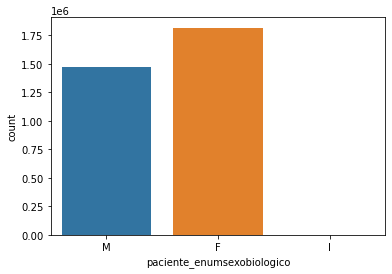

In [17]:
sns.countplot(x = data_vac['paciente_enumsexobiologico']);

Já podemos responder a umas das perguntas levantas **quanto ao gênero (homem/mulher) que foi mais cobertos com a vacinação?** A análise preliminar mostra que mais mulheres foram vacinadas em comparação ao quantitativo de homens.

### Podemos analisar o perfil quanto a raça dos vacinados
O dicionário dos dados fornece:

1 - branca

2 - preta

3 - parda

4- amarela

5 - indigena

99- sem informação

In [18]:
# contando os valores únicos que existem na coluna 'raça'
# Esse grafico de contagem pode tanto ser feito a partir da coluna paciente_racacor_valor 
# quanto paciente_racacor_codigo

np.unique(data_vac['paciente_racacor_codigo'], return_counts=True)

(array([ 1.,  2.,  3.,  4.,  5., 99., nan]),
 array([968146, 128583, 976304, 694427,   1419, 520663,      1]))

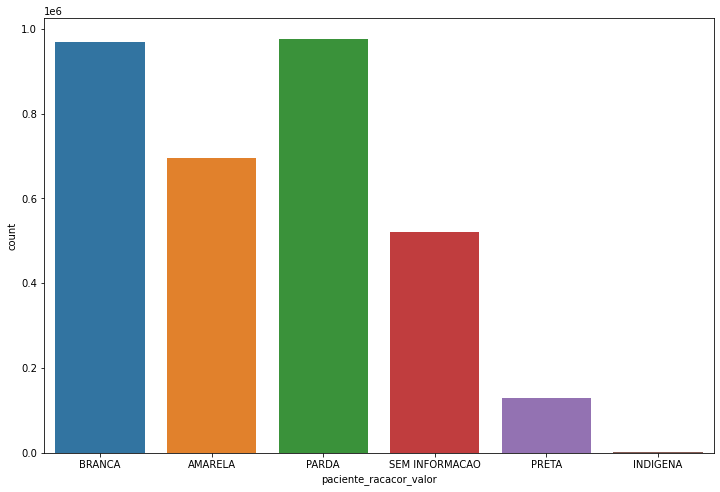

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(x = data_vac['paciente_racacor_valor']);

A contagem mostra que, quanto a raça as pessoas se identificam em:

1 - brancos - 701542 pessoas vacinadas.

2 - preta -  95222 pessoas vacinadas.

3 - parda - 696203 pessoas vacinadas.

4 - amarela -  489281 pessoas vacinadas.

5 - indigena - 1015 vacinados

99 - sem informação - 385703 vacinados

apenas um dado é inconsistente.

E com isso respondemos a mais uma pergunta sobre qual é o **perfil dos vacinados quanto a raça**.

### Números quanto ao número de doses aplicadas
para responder as perguntas:

Quantas pessoas já estão vacinadas com pelo menos uma dose (D1)? temos que 1706098 tomaram pelo menos uma dose

Quantas pessoas já estão completamente vacinadas (D1+D2) ou dose única? 609797 + 50966 + 2106 = 662869 estão completamente imunizadas com duas doses ou uma doze única

O gráfico abaixo nos mostra que o maior número de pessoas tomou apenas a primeira dose da vacina

In [22]:
# As linhas abaixo são referentes a mesma vacina Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag
print(data_vac[data_vac['vacina_descricao_dose'] == 'Dose\xa0'].shape)
print(data_vac[data_vac['vacina_descricao_dose'] == 'Única\xa0'].shape)

# num dataframe transformado elas poderiam ser mescladas

(2175, 34)
(54203, 34)


In [23]:
# contando os valores únicos que existem na coluna 'vacina_descricao_dose
np.unique(data_vac['vacina_descricao_dose'], return_counts=True)

(array(['1ª\xa0Dose', '2ª\xa0Dose', 'Dose\xa0', 'Reforço\xa0', 'Única\xa0'],
       dtype=object),
 array([2193360, 1039718,    2175,      87,   54203]))

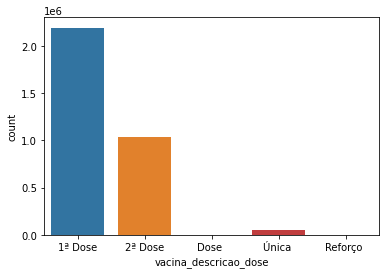

In [25]:
sns.countplot(x = data_vac['vacina_descricao_dose']);

### Quanto ao fabricante da vacina - Qual foi a vacina mais aplicada por fabricante?

O dicionário informa os seguintes códigos

85 - Vacina covid-19 covishield - Astra/Zeneca -  1127963 doses

86 - Coronavac - Sinovac/Butantan - 846328 doses

87 - Vacina covid-19 BNT 162b2 - BioNthech/Pfizer - 846328 doses

88 - Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag - 53988 doses

In [26]:
# data_vac[data_vac['vacina_descricao_dose'] == 'Dose\xa0'][:2]
# data_vac[data_vac['vacina_descricao_dose'] == 'Única\xa0'][:2]

In [27]:
#quanto ao fabricante
np.unique(data_vac['vacina_codigo'], return_counts=True)

(array([85, 86, 87, 88]), array([1480183, 1042544,  709529,   57287]))

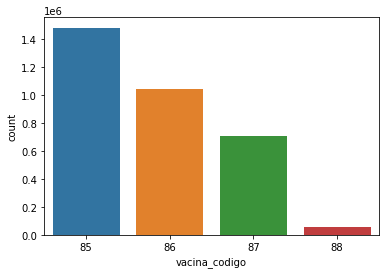

In [29]:
sns.countplot(x = data_vac['vacina_codigo']);

## Tratando os valores inconsistentes 

In [30]:
#removendo colunas que nao sao de interesse
#primeiro identificamos todas as colunas do nosso dataframe
data_vac.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_datanascimento', 'paciente_enumsexobiologico',
       'paciente_racacor_codigo', 'paciente_racacor_valor',
       'paciente_endereco_coibgemunicipio', 'paciente_endereco_copais',
       'paciente_endereco_nmmunicipio', 'paciente_endereco_nmpais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumnacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaosocial', 'estalecimento_nofantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoatendimento_codigo',
       'vacina_grupoatendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataaplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem', 'data_importacao_rnds', 'id_sistema_origem'],
      

In [31]:
# Apagando colunas que nao sao de interesse com o .drop
# document_id, pacient_id, paciente_datanascimento, paciente (de todos os registros da base de dados)

base_vacina2 = data_vac.drop(['document_id', 'paciente_id', 
       'paciente_datanascimento', 'paciente_racacor_valor',
       'paciente_endereco_coibgemunicipio', 'paciente_endereco_copais',
       'paciente_endereco_uf', 'paciente_endereco_nmpais',
       'paciente_endereco_cep', 'paciente_nacionalidade_enumnacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaosocial', 'estalecimento_nofantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoatendimento_codigo',
       'vacina_grupoatendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome', 'vacina_fabricante_referencia',
       'vacina_dataaplicacao', 'vacina_nome',
       'sistema_origem', 'data_importacao_rnds', 'id_sistema_origem' ], axis=1)

In [32]:
base_vacina2

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo
0,63.0,M,1.0,JARDIM DO SERIDO,1ª Dose,85
1,59.0,F,4.0,ALEXANDRIA,2ª Dose,85
2,34.0,M,4.0,SAO PAULO DO POTENGI,1ª Dose,87
3,54.0,M,3.0,NATAL,2ª Dose,85
4,22.0,M,1.0,NATAL,1ª Dose,87
...,...,...,...,...,...,...
3289538,50.0,M,99.0,PARNAMIRIM,1ª Dose,85
3289539,37.0,M,1.0,MARCELINO VIEIRA,1ª Dose,87
3289540,28.0,M,1.0,CAICO,1ª Dose,87
3289541,82.0,M,1.0,TAIPU,1ª Dose,85


In [33]:
pd.options.display.float_format = '{:.2f}'.format

base_vacina2.describe()

,paciente_idade,paciente_racacor_codigo,vacina_codigo
count,3289542.00,3289542.00,3289543.00
mean,47.85,17.78,85.80
std,17.87,35.24,0.83
min,0.00,1.00,85.00
25%,33.00,1.00,85.00
50%,47.00,3.00,86.00
75%,61.00,4.00,86.00
max,131.00,99.00,88.00


In [35]:
# verificando valores onde se encontram dados nao-nulos 
#Contagem de dados não-nulos de todas as colunas com o .count
base_vacina2.count() == 3289543 

paciente_idade                   False
paciente_enumsexobiologico       False
paciente_racacor_codigo          False
paciente_endereco_nmmunicipio    False
vacina_descricao_dose             True
vacina_codigo                     True
dtype: bool

Note que temos as colunas:
paciente_idade                  
paciente_enumsexobiologico       
paciente_racacor_codigo         
paciente_endereco_nmmunicipio    

com menos dados que o total

In [37]:
# Descobrindo a quantidade de valores inconsistentes ou faltantes 
print(base_vacina2.paciente_idade.count())
print(base_vacina2.paciente_enumsexobiologico.count())
print(base_vacina2.paciente_racacor_codigo.count())
print(base_vacina2.paciente_endereco_nmmunicipio.count())  

3289542
3289542
3289542
3279032


A maior quantidade de dados faltantes está em no município com 7614 entradas não preenchidas!

### 1 - Corrigindo a idade

In [40]:
base_vacina2.loc[base_vacina2['paciente_idade'] == 0 ] 

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo
633614,0.00,F,1.00,NATAL,1ª Dose,86
1824472,0.00,F,3.00,CEARA-MIRIM,1ª Dose,87
2453431,0.00,M,1.00,NATAL,1ª Dose,87
3245018,0.00,M,99.00,NaN,1ª Dose,85
3288569,0.00,F,4.00,SAO GONCALO DO AMARANTE,1ª Dose,86


In [41]:
base_vacina2.loc[pd.isnull(base_vacina2['paciente_idade'])]

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo
924836,NaN,NaN,NaN,NaN,1ª Dose,85


Temos 6 linhas com idades não válidas sendo 5 com idade 0 e 1 com valor faltante.
Podemos preencher com a média



In [42]:
base_vacina2.loc[base_vacina2['paciente_idade'] == 0, 'paciente_idade' ] = base_vacina2['paciente_idade'].mean()
base_vacina2.loc[pd.isnull(base_vacina2['paciente_idade']),  'paciente_idade'] =  base_vacina2['paciente_idade'].mean()

In [43]:
base_vacina2.loc[base_vacina2['paciente_idade'] == 0 ] 

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo


In [44]:
base_vacina2.loc[pd.isnull(base_vacina2['paciente_idade'])]

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo


### 2 - Corrigindo o paciente_enumsexobiologico

In [57]:
base_vacina2.loc[base_vacina2['paciente_enumsexobiologico'] == ' ' ] 

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo


In [58]:
base_vacina2.loc[base_vacina2['paciente_enumsexobiologico'] == 'I' ] 

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo
614572,89.00,I,1.00,NATAL,1ª Dose,86
1632680,72.00,I,1.00,NATAL,2ª Dose,86
2050317,72.00,I,1.00,NATAL,1ª Dose,86
2052900,53.00,I,1.00,CANGUARETAMA,1ª Dose,85
2298611,79.00,I,99.00,PARNAMIRIM,2ª Dose,86
2673841,79.00,I,99.00,PARNAMIRIM,1ª Dose,86
3042325,51.00,I,2.00,SANTO ANTONIO,1ª Dose,85


In [63]:
base_vacina2.loc[pd.isnull(base_vacina2['paciente_enumsexobiologico'])]

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo
924836,47.85,NaN,NaN,NaN,1ª Dose,85


In [64]:
base_vacina3 = base_vacina2.drop(base_vacina2.loc[base_vacina2['paciente_enumsexobiologico'] == 'I' ].index)

In [65]:
base_vacina3.loc[pd.isnull(base_vacina3['paciente_enumsexobiologico'])]

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo
924836,47.85,NaN,NaN,NaN,1ª Dose,85


In [66]:
base_vacina3 = base_vacina3.drop(base_vacina3.loc[pd.isnull(base_vacina3['paciente_enumsexobiologico'])].index)

### 3 -corrigindo  paciente_racacor_codigo

In [67]:
base_vacina3.loc[base_vacina3['paciente_racacor_codigo'] == 0 ] 

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo


In [68]:
base_vacina3.loc[pd.isnull(base_vacina3['paciente_racacor_codigo'])]

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo


Por se tratar de somente uma linha e ser um atributo categórico podemos excluir esse dado ou substituir pelo que aparece mais vezes.

In [69]:
base_vacina3 = base_vacina3.drop(384)

In [70]:
base_vacina3

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo
0,63.00,M,1.00,JARDIM DO SERIDO,1ª Dose,85
1,59.00,F,4.00,ALEXANDRIA,2ª Dose,85
2,34.00,M,4.00,SAO PAULO DO POTENGI,1ª Dose,87
3,54.00,M,3.00,NATAL,2ª Dose,85
4,22.00,M,1.00,NATAL,1ª Dose,87
...,...,...,...,...,...,...
3289538,50.00,M,99.00,PARNAMIRIM,1ª Dose,85
3289539,37.00,M,1.00,MARCELINO VIEIRA,1ª Dose,87
3289540,28.00,M,1.00,CAICO,1ª Dose,87
3289541,82.00,M,1.00,TAIPU,1ª Dose,85


In [71]:
base_vacina3.count() == 3289534

paciente_idade                    True
paciente_enumsexobiologico        True
paciente_racacor_codigo           True
paciente_endereco_nmmunicipio    False
vacina_descricao_dose             True
vacina_codigo                     True
dtype: bool

Note que agora, somente a coluna  endereco_nmmunicipio  contém dados faltantes

### 4 -corrigindo  paciente_endereco_nmmunicipio 

In [72]:
# testando para ver se tem algum resultado nan
base_vacina3.loc[pd.isnull(base_vacina3['paciente_endereco_nmmunicipio'])]

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo
651,67.00,M,99.00,NaN,2ª Dose,85
836,23.00,M,4.00,NaN,1ª Dose,85
1096,58.00,F,99.00,NaN,1ª Dose,85
1451,70.00,M,1.00,NaN,2ª Dose,85
1601,73.00,F,99.00,NaN,2ª Dose,86
...,...,...,...,...,...,...
3287221,58.00,F,99.00,NaN,1ª Dose,87
3287457,29.00,F,1.00,NaN,1ª Dose,85
3288263,32.00,M,99.00,NaN,1ª Dose,86
3288281,46.00,M,2.00,NaN,1ª Dose,86


In [73]:
df = base_vacina3.drop(base_vacina3.loc[pd.isnull(base_vacina3['paciente_endereco_nmmunicipio'])].index)

In [74]:
df

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo
0,63.00,M,1.00,JARDIM DO SERIDO,1ª Dose,85
1,59.00,F,4.00,ALEXANDRIA,2ª Dose,85
2,34.00,M,4.00,SAO PAULO DO POTENGI,1ª Dose,87
3,54.00,M,3.00,NATAL,2ª Dose,85
4,22.00,M,1.00,NATAL,1ª Dose,87
...,...,...,...,...,...,...
3289538,50.00,M,99.00,PARNAMIRIM,1ª Dose,85
3289539,37.00,M,1.00,MARCELINO VIEIRA,1ª Dose,87
3289540,28.00,M,1.00,CAICO,1ª Dose,87
3289541,82.00,M,1.00,TAIPU,1ª Dose,85


In [75]:
df.count() == 3279024

paciente_idade                   True
paciente_enumsexobiologico       True
paciente_racacor_codigo          True
paciente_endereco_nmmunicipio    True
vacina_descricao_dose            True
vacina_codigo                    True
dtype: bool

In [76]:
df.loc[pd.isnull(base_vacina3['vacina_descricao_dose'])]

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo


### 5 -corrigindo  vacina_descricao_dose	
Vamos substituit a descrição 'dose' por 'unica'

In [77]:
# print(data_vac[data_vac['vacina_descricao_dose'] == 'Dose\xa0'].shape)
# print(data_vac[data_vac['vacina_descricao_dose'] == 'Única\xa0'].shape)

df.loc[df['vacina_descricao_dose'] ==  'Dose\xa0', 'vacina_descricao_dose' ] = 'Única\xa0'

In [78]:
df.loc[df['vacina_descricao_dose']==  'Dose\xa0']

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo


In [79]:
print(df[df['vacina_descricao_dose'] == 'Dose\xa0'].shape)
print(df[df['vacina_descricao_dose'] == 'Única\xa0'].shape)

(0, 6)
(56172, 6)


In [81]:
df.count()

paciente_idade                   3279024
paciente_enumsexobiologico       3279024
paciente_racacor_codigo          3279024
paciente_endereco_nmmunicipio    3279024
vacina_descricao_dose            3279024
vacina_codigo                    3279024
dtype: int64

# Salvand novo Dataframe com os dados tratados

In [82]:
df.to_csv('dados_vacina_RN_clean.csv')

In [83]:
#contando os valores únicos que existem na coluna 'sexo'
np.unique(df['paciente_enumsexobiologico'], return_counts=True)

(array(['F', 'M'], dtype=object), array([1812526, 1466498]))

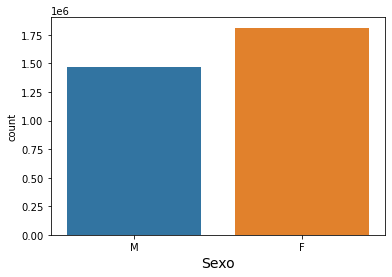

In [84]:
sns.countplot(x = df['paciente_enumsexobiologico']);
plt.xlabel('Sexo', size=14)
plt.show()

In [85]:
#quanto ao fabricante
np.unique(df['vacina_codigo'], return_counts=True)

(array([85, 86, 87, 88]), array([1475683, 1038943,  707318,   57080]))

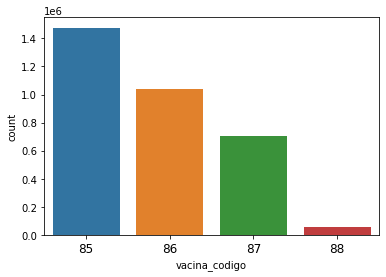

In [86]:
sns.countplot(x = df['vacina_codigo']);
plt.xticks(size=12)
plt.show()

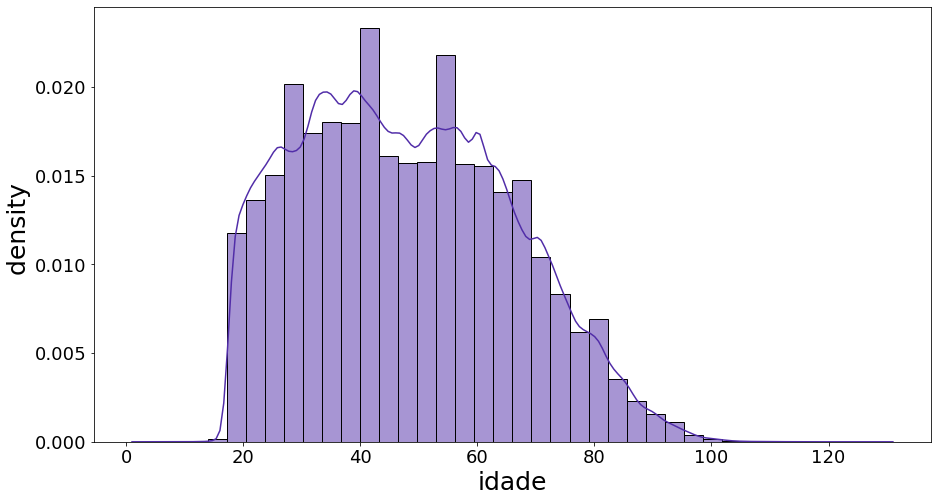

In [87]:
# os numeros por idade
plt.figure(figsize=(15, 8))
sns.histplot(x = df['paciente_idade'], bins=40, kde=True, stat="density", color='#512DA8')
plt.xticks(size =18)
plt.yticks(size = 18)
plt.xlabel('idade', size =25)
plt.ylabel('density ', size =25)

plt.show()

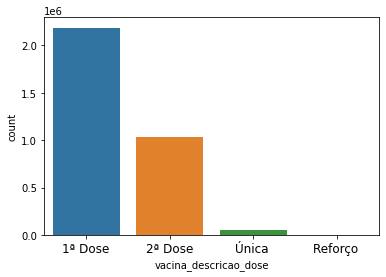

In [88]:
sns.countplot(x = df['vacina_descricao_dose']);
plt.xticks(size=12)
plt.show()